Response Body:  b'<!DOCTYPE html><html class="fontawesome-i2svg-active fontawesome-i2svg-complete" lang="en" data-whatinput="initial" data-whatintent="initial"><head><script type="text/javascript" async="" src="https://static.criteo.net/js/ld/publishertag.prebid.117.js"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202308030101/reactive_library_fy2021.js"></script><script type="text/javascript" async="" src="https://script.4dex.io/localstore.js"></script>\n<meta charset="utf-8">\n<meta http-equiv="x-ua-compatible" content="ie=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<meta name="theme-color" content="#dc143c">\n<meta http-equiv="Content-Language" content="EN">\n<meta name="description" content="Perfumes Search - Fragrantica: Your Online Destination for All Things Fragrance\nDiscover the world of perfumes with Fragrantica, a comprehensive online ...">\n<meta name="robots" content="index, follow, max-image-pre
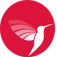

In [20]:
import requests

response = requests.get(
  url='https://proxy.scrapeops.io/v1/',
  params={
      'api_key': '24215c19-41e3-417f-8281-4ec2a77d807e',
      'url': 'https://www.fragrantica.com/search/?osobine.EN=Floral',
      'bypass': 'cloudflare'
  },
)

print('Response Body: ', response.content)

In [21]:
from bs4 import BeautifulSoup as bs
import time
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pandas as pd
import re
import selenium
from pandas import DataFrame

In [22]:
soup = bs(response.content, "html.parser")

<!DOCTYPE html>
<html class="fontawesome-i2svg-active fontawesome-i2svg-complete" data-whatinput="initial" data-whatintent="initial" lang="en"><head><script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.117.js" type="text/javascript"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202308030101/reactive_library_fy2021.js"></script><script async="" src="https://script.4dex.io/localstore.js" type="text/javascript"></script>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="#dc143c" name="theme-color"/>
<meta content="EN" http-equiv="Content-Language"/>
<meta content="Perfumes Search - Fragrantica: Your Online Destination for All Things Fragrance
Discover the world of perfumes with Fragrantica, a comprehensive online ..." name="description"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-v
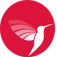

In [23]:
soup

In [27]:
block1 = soup.find("span", class_="grid-x grid-margin-x grid-margin-y small-up-3 medium-up-2 large-up-4 perfumes-row text-center")

In [28]:
len(block1)

30

In [ ]:
script = soup.select_one('[type="text/show-more"]')
script.replace_with(BeautifulSoup(script.contents[0], "html.parser"))

In [30]:
perfume_name = []
perfume_link_list=[]
for perf_text in block1.find_all("a", href=True):
        perf_name = perf_text.get_text()
        perfume_name_list.append(perf_name.replace('\n', '').strip(" "))
        perfume_link_list.append(perf_text['href'])

Delina
My Way
Chloe Eau de Parfum
Pure Poison
Miss Dior Blooming Bouquet
Flora Gorgeous Gardenia Eau de Parfum
Gucci Bloom
Armani Code for Women
Orchidee Vanille
Miracle
Psychedelic Love
Carnal Flower
Crystal Noir Eau de Toilette
J'adore Parfum d'Eau
Terracotta Le Parfum
Peony & Blush Suede
Gris Dior
Poeme
Dolce&Gabbana Pour Femme
Pas Сe Soir
Twilly d’Hermès
La Tulipe
Libre Eau de Toilette
London
Narcotic Venus
Flora Gorgeous Jasmine
Yellow Diamond
Gabrielle
A La Rose
5th Avenue


In [50]:
from splinter import Browser

In [30]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
import time
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pandas as pd
import re
import selenium
from pandas import DataFrame
import json

In [31]:
def init_browser():
    # @NOTE: Replace the path with your actual path to the chromedriver
    return Browser("chrome", headless=False)

In [33]:
browser = init_browser()
url = "https://www.fragrantica.com/search/?osobine.EN=Floral"
browser.visit(url)

In [16]:
html = browser.html
soup = bs(html, "html.parser")

In [34]:
html = browser.html
soup = bs(html, "html.parser")

for i in range(2015,2022):
    #try:
        ####### CHANGE THE YEAR SETTING #######
        browser.find_by_css('input[type="number"]')[1].fill(i)
        browser.find_by_css('input[type="number"]')[0].fill(i)
        time.sleep(5)

        ####### CLICK "SHOW MORE RESULTS" #######
        ####### with this coded out, we only get 40 results per year ######
        for j in range(0,100):
            try:
                browser.find_by_css('button[class="button"]').click()
                time.sleep(5)
            except:
                break
            
        html = browser.htmlsoup = bs(html, "html.parser")
        

        ####### GET THE LENGTH OF THE RESULTS #######
        block1 = soup.find("span", class_="grid-x grid-margin-x grid-margin-y small-up-3 medium-up-2 large-up-4 perfumes-row text-center")
    
        perfume_name_list = []
        perfume_link_list = []
        perfume_img_link = []
        perfume_company_list = []  # Changed from 'perfume_company_link' to 'perfume_company_list'
        
        for perf_text in block1.find_all("a", href=True):
                perf_name = perf_text.get_text()
                perfume_name_list.append(perf_name.replace('\n', '').strip(" "))
                perfume_link_list.append(perf_text['href'])

        for perf_block in block1.find_all("div", class_="cell card fr-news-box"):
            perf_texts = perf_block.find_all("a", href=True)
            for perf_text in perf_text:
                perf_name = perf_text.get_text().strip()
                perfume_name_list.append(perf_name)
            perfume_link_list.append(perf_text['href'])

            # Since each 'perf_block' contains an image, find it directly in the block
            perfume_image = perf_block.find("div", class_="card-section").find("img")["src"]
            perfume_img_link.append(perfume_image)

            # Use 'perf_block' to find the company name
            perfume_comp = perf_block.find("div", class_="card-section").find("small").get_text()
            perfume_company_list.append(perfume_comp)


In [35]:
len(perfume_name_list)
len(perfume_link_list)

60

In [26]:
len(perfume_link_list)

0

In [66]:

html = browser.html
soup = bs(html, "html.parser")

In [67]:
block1 = soup.find("span", class_="grid-x grid-margin-x grid-margin-y small-up-3 medium-up-2 large-up-4 perfumes-row text-center")
perfume_name_list = []
for perf_text in block1.find_all("a", href=True):
    perf_name = perf_text.get_text()
    perfume_name_list.append(perf_name.replace('\n', '').strip(" "))
     perf_text['href']

In [68]:
len(perfume_name_list)

120

In [70]:
perfume_name_list

['Delina',
 'My Way',
 'Chloe Eau de Parfum',
 'Pure Poison',
 'Miss Dior Blooming Bouquet',
 'Flora Gorgeous Gardenia Eau de Parfum',
 'Gucci Bloom',
 'Armani Code for Women',
 'Orchidee Vanille',
 'Miracle',
 'Psychedelic Love',
 'Carnal Flower',
 'Crystal Noir Eau de Toilette',
 "J'adore Parfum d'Eau",
 'Terracotta Le Parfum',
 'Peony & Blush Suede',
 'Gris Dior',
 'Poeme',
 'Dolce&Gabbana Pour Femme',
 'Pas Сe Soir',
 'Twilly d’Hermès',
 'La Tulipe',
 'Libre Eau de Toilette',
 'London',
 'Narcotic Venus',
 'Flora Gorgeous Jasmine',
 'Yellow Diamond',
 'Gabrielle',
 'A La Rose',
 '5th Avenue',
 'Tears From The Moon',
 'Laura',
 'Honour 43 Woman',
 'Sur La Lande',
 'Her Choice',
 "L'Eau Couture",
 'Modest Mimosa',
 'La Fenice Pour Femme',
 'Chloë Sevigny Little Flower',
 'White Musk',
 'Devil Tender',
 'Private Collection Tuberose Gardenia',
 'Beyond Paradise',
 'Cruel Gardénia',
 'Turkish Rose Perfume Oil',
 'Pleasures Intense',
 'Aqua Kiss',
 'Verveine',
 'Néroli & Orchidée',
 'Lol

In [71]:
html = browser.html
soup = bs(html, "html.parser")

In [93]:
for j in range(0,100):
    try:
        browser.find_by_css('button[class="button"]').click()
        time.sleep(5)
    except:
        break

In [94]:
html = browser.html
soup = bs(html, "html.parser")

In [10]:
block1 = soup.find("span", class_="grid-x grid-margin-x grid-margin-y small-up-3 medium-up-2 large-up-4 perfumes-row text-center")
perfume_name_list = []
for perf_text in block1.find_all("a", href=True):
    perf_name = perf_text.get_text()
    perfume_name_list.append(perf_name.replace('\n', '').strip(" "))

In [12]:
for a in block1.find_all('a', href=True):
    print("Found the URL:", a['href'])

Found the URL: https://www.fragrantica.com/perfume/Parfums-de-Marly/Delina-43871.html
Found the URL: https://www.fragrantica.com/perfume/Giorgio-Armani/My-Way-62036.html
Found the URL: https://www.fragrantica.com/perfume/Chloe/Chloe-Eau-de-Parfum-1733.html
Found the URL: https://www.fragrantica.com/perfume/Dior/Pure-Poison-214.html
Found the URL: https://www.fragrantica.com/perfume/Dior/Miss-Dior-Blooming-Bouquet-23280.html
Found the URL: https://www.fragrantica.com/perfume/Gucci/Flora-Gorgeous-Gardenia-Eau-de-Parfum-68578.html
Found the URL: https://www.fragrantica.com/perfume/Gucci/Gucci-Bloom-44894.html
Found the URL: https://www.fragrantica.com/perfume/Giorgio-Armani/Armani-Code-for-Women-413.html
Found the URL: https://www.fragrantica.com/perfume/Van-Cleef-Arpels/Orchidee-Vanille-6463.html
Found the URL: https://www.fragrantica.com/perfume/Lancome/Miracle-184.html
Found the URL: https://www.fragrantica.com/perfume/Initio-Parfums-Prives/Psychedelic-Love-45977.html
Found the URL: ht

In [ ]:
perfume_image = block1.find_all("div", class_="cell small-12")[1].find("img")["src"]